In [1]:
from maws.model_builder import build_model
from maws.utils import start_inference_mode

In [2]:
start_inference_mode(device="cpu")

In [3]:
clip_model = build_model("vit_b16_xlmr_b", "maws_clip")
# clip_model = build_model("vit_l16_xlmr_l", "maws_clip")
# clip_model = build_model("vit_h14_xlmr_l", "maws_clip")
# clip_model = build_model("vit_2b14_xlmr_l", "maws_clip")
_ = clip_model.eval()

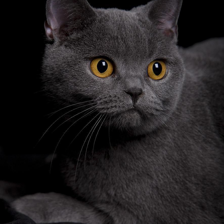

In [4]:
image_path = "https://upload.wikimedia.org/wikipedia/commons/5/53/Sheba1.JPG"
display(clip_model.get_cropped_images(image_path))

In [5]:
from maws.utils import predict_probs_and_plot

/private/home/mannatsingh/.conda/envs/maws/lib/python3.10/site-packages/torch/nn/modules/transformer.py:296: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at ../aten/src/ATen/NestedTensorImpl.cpp:177.)
  output = torch._nested_tensor_from_mask(output, src_key_padding_mask.logical_not(), mask_check=False)


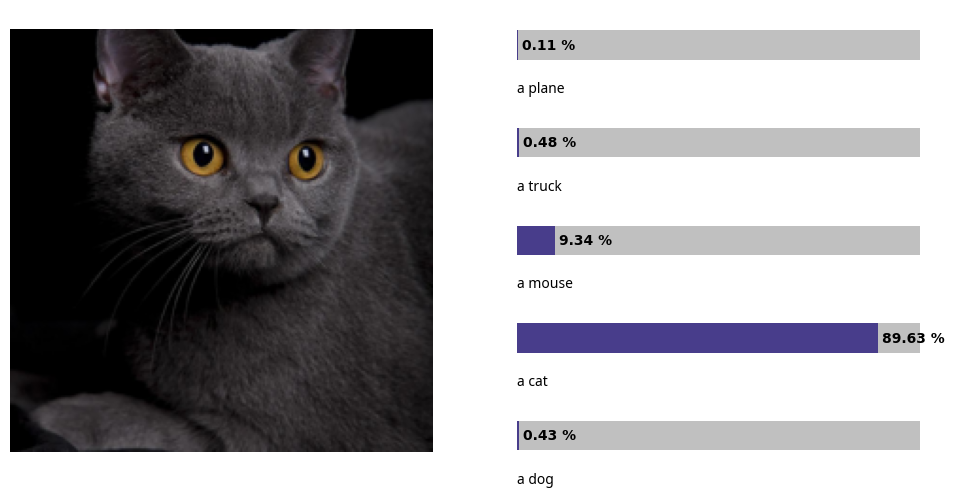

In [6]:
# English
texts = [
    "a dog",
    "a cat",
    "a mouse",
    "a truck",
    "a plane",
]

predict_probs_and_plot(clip_model, image_path, texts, plot_image=True)

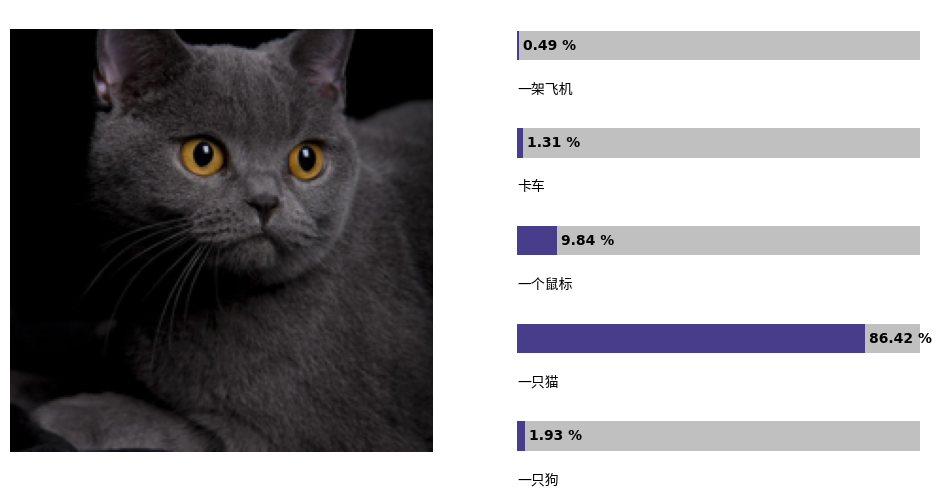

In [7]:
# Chinese (simplified)
texts = [
    "一只狗",
    "一只猫",
    "一个鼠标",
    "卡车",
    "一架飞机",
]

predict_probs_and_plot(clip_model, image_path, texts, plot_image=True, lang_type="cjk")

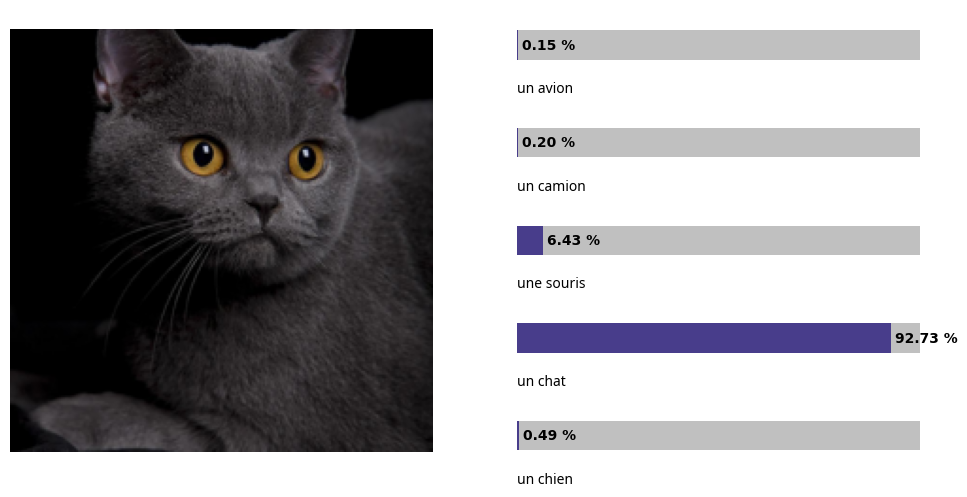

In [8]:
# French
texts = [
    "un chien",
    "un chat",
    "une souris",
    "un camion",
    "un avion",
]

predict_probs_and_plot(clip_model, image_path, texts, plot_image=True)

/private/home/mannatsingh/.conda/envs/maws/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 108 (l) missing from current font.
  func(*args, **kwargs)
/private/home/mannatsingh/.conda/envs/maws/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 112 (p) missing from current font.
  func(*args, **kwargs)
/private/home/mannatsingh/.conda/envs/maws/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/private/home/mannatsingh/.conda/envs/maws/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


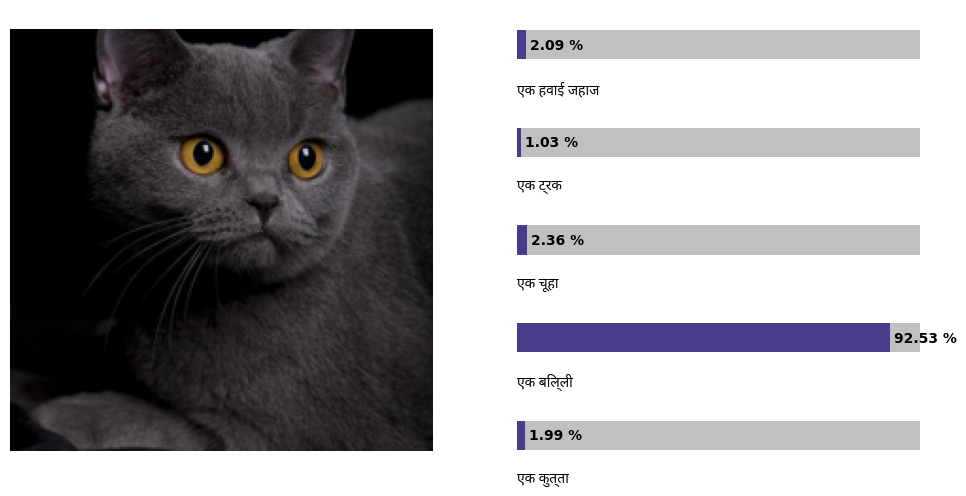

In [9]:
# Hindi
texts = [
    "एक कुत्ता",
    "एक बिल्ली",
    "एक चूहा",
    "एक ट्रक",
    "एक हवाई जहाज",
]

predict_probs_and_plot(clip_model, image_path, texts, plot_image=True, lang_type="devanagari")

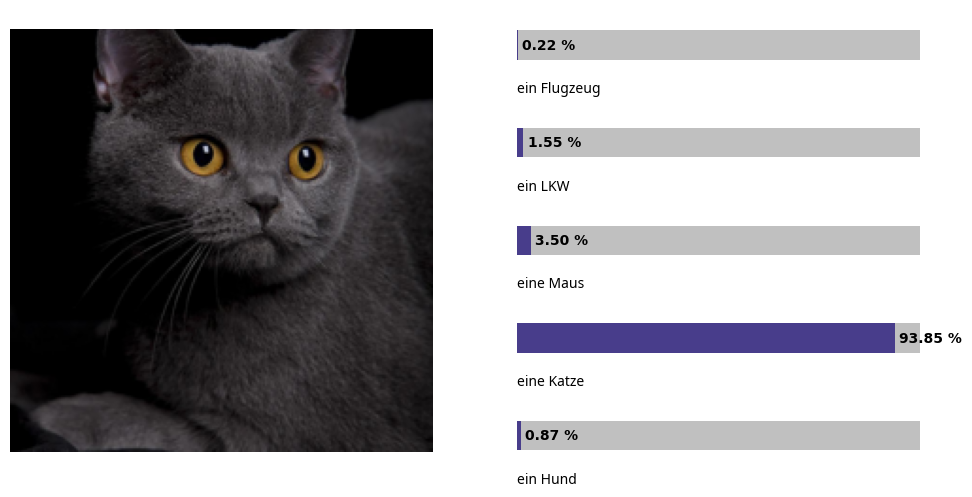

In [10]:
# German
texts = [
    "ein Hund",
    "eine Katze",
    "eine Maus",
    "ein LKW",
    "ein Flugzeug",
]

predict_probs_and_plot(clip_model, image_path, texts, plot_image=True)

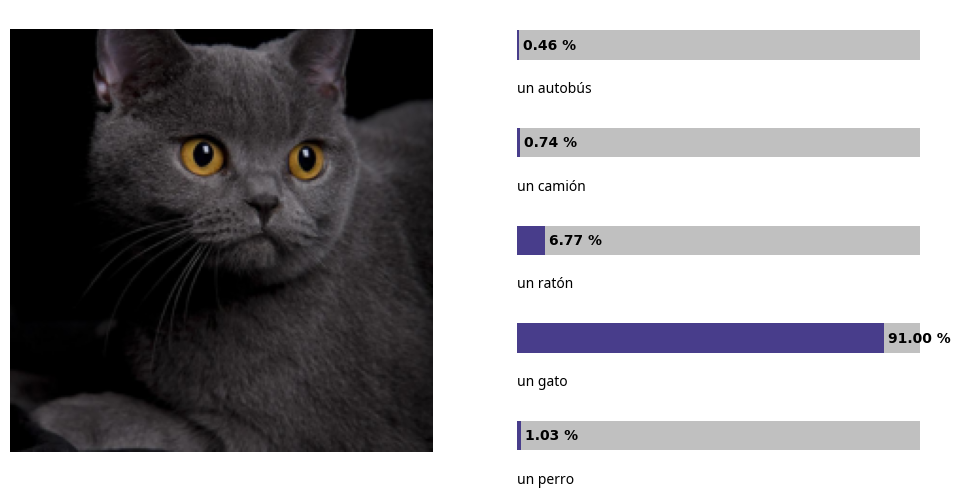

In [11]:
# Spanish
texts = [
    "un perro",
    "un gato",
    "un ratón",
    "un camión",
    "un autobús",
]

predict_probs_and_plot(clip_model, image_path, texts, plot_image=True)

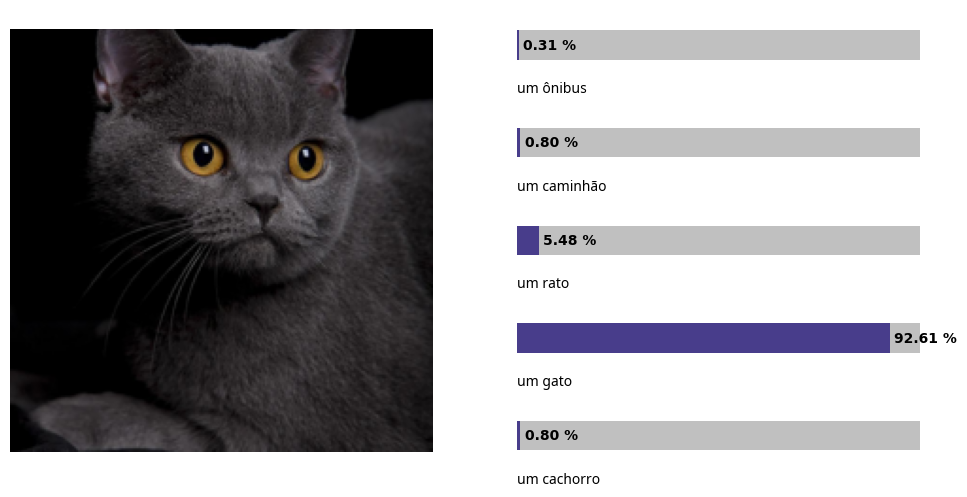

In [12]:
# Portuguese
texts = [
    "um cachorro",
    "um gato",
    "um rato",
    "um caminhão",
    "um ônibus",
]

predict_probs_and_plot(clip_model, image_path, texts, plot_image=True)

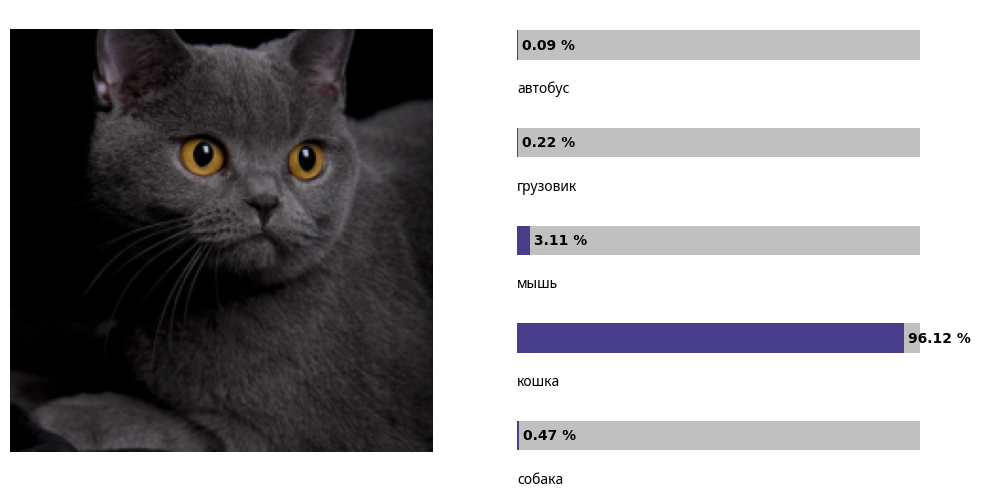

In [13]:
# Russian
texts = [
    "собака",
    "кошка",
    "мышь",
    "грузовик",
    "автобус",
]

predict_probs_and_plot(clip_model, image_path, texts, plot_image=True)

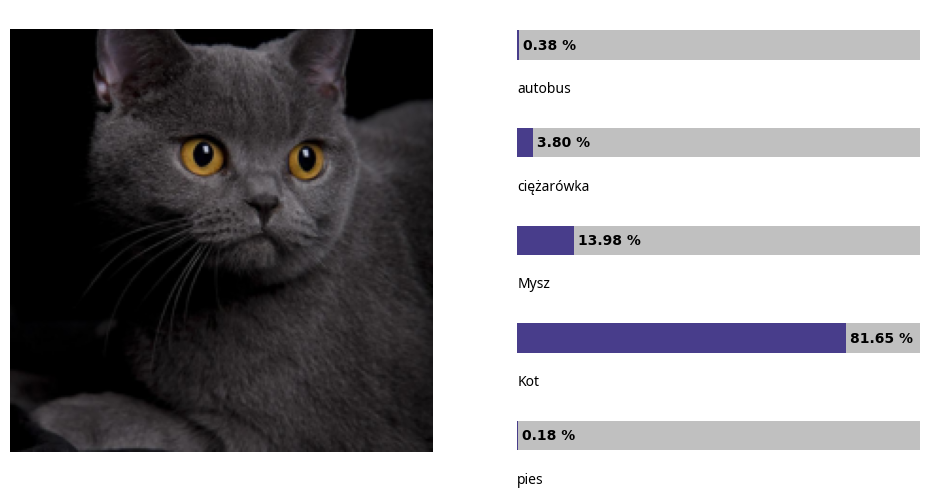

In [14]:
# Polish
texts = [
    "pies",
    "Kot",
    "Mysz",
    "ciężarówka",
    "autobus",
]

predict_probs_and_plot(clip_model, image_path, texts, plot_image=True)

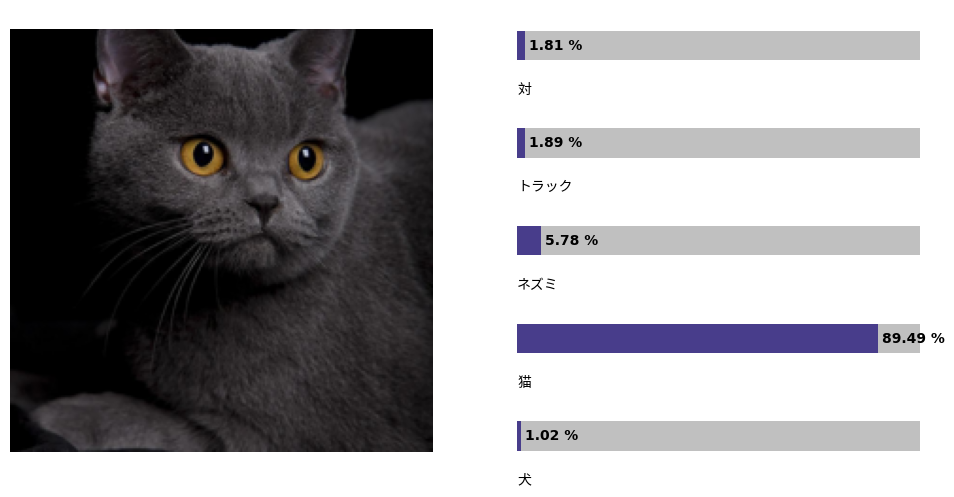

In [15]:
# Japanese
texts = [
    "犬",
    "猫",
    "ネズミ",
    "トラック",
    "対",
]

predict_probs_and_plot(clip_model, image_path, texts, plot_image=True, lang_type="cjk")

/private/home/mannatsingh/.conda/envs/maws/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from current font.
  func(*args, **kwargs)
/private/home/mannatsingh/.conda/envs/maws/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 128049 (\N{CAT FACE}) missing from current font.
  func(*args, **kwargs)
/private/home/mannatsingh/.conda/envs/maws/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 128001 (\N{MOUSE}) missing from current font.
  func(*args, **kwargs)
/private/home/mannatsingh/.conda/envs/maws/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from current font.
  func(*args, **kwargs)
/private/home/mannatsingh/.conda/envs/maws/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 9972 (\N{FERRY}) missing from current font.
  func(*args, **kwargs)
/private/home/mannatsingh/.conda/envs/maws/lib/pyth

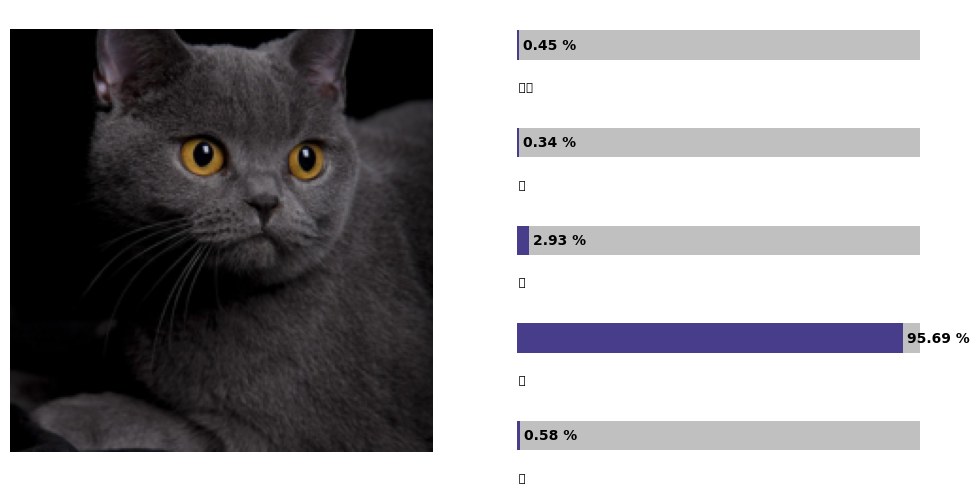

In [19]:
# Emojis 🤩
texts = [
    "🐶",
    "🐱",
    "🐁",
    "🚗",
    "⛴️",
]

predict_probs_and_plot(clip_model, image_path, texts, plot_image=True)

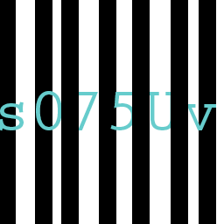

In [20]:
image_path = "https://upload.wikimedia.org/wikipedia/commons/1/18/S075Uv_-_CAPTCHA_images.png"
display(clip_model.get_cropped_images(image_path))

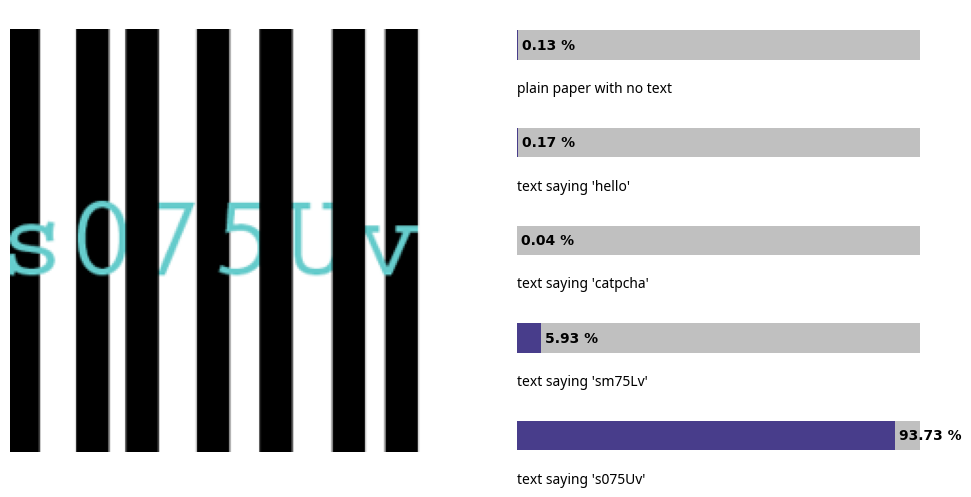

In [21]:
# English
texts = [
    "text saying 's075Uv'",
    "text saying 'sm75Lv'",
    "text saying 'catpcha'",
    "text saying 'hello'",
    "plain paper with no text",
]

predict_probs_and_plot(clip_model, image_path, texts, plot_image=True)